In [1]:
import detprocess

import numpy as np
np.set_printoptions(linewidth=1000)

import qetpy as qp
import pickle
from matplotlib import pyplot as plt
import matplotlib as mpl
from pytesdaq.io import FilterH5IO
mpl.rcParams['font.size'] = 16
import glob
from pytesdaq.io.hdf5 import H5Reader
import time
import h5py
import scipy.stats as stats

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


KeyboardInterrupt: 

In [2]:
template = detprocess.Template(verbose=True)

template.load_hdf5('nxmfilterfile.hdf5')

template.describe()

INFO: Loading filter data from file nxmfilterfile.hdf5
List of channels: ['Mv3025pcRegularRight', 'Mv3025pcRegularLeft+Mv3025pcRegularRight', 'Mv3025pcRegularLeft|Mv3025pcRegularRight', 'Mv3025pcRegularLeft', 'Mv3025pcBigFinsRight', 'Mv3025pcBigFinsLeft+Mv3025pcBigFinsRight', 'Mv3025pcBigFinsLeft|Mv3025pcBigFinsRight', 'Mv3025pcBigFinsLeft']

Channel Mv3025pcRegularRight:
 * Tag "default":
    psd: pandas.Series (25000,)
    template: pandas.Series (25000,)
 * Tag "single":
    template: pandas.Series (25000,)

Channel Mv3025pcRegularLeft+Mv3025pcRegularRight:
 * Tag "default":
    psd: pandas.Series (25000,)
    template: pandas.Series (25000,)

Channel Mv3025pcRegularLeft|Mv3025pcRegularRight:
 * Tag "default":
    csd: 3D numpy.array  (2, 2, 25000)
 * Tag "freqs_default":
    csd: pandas.Series (25000,)
 * Tag "shared_2x2":
    template: 3D numpy.array  (2, 2, 25000)
 * Tag "shared":
    template: 3D numpy.array  (2, 1, 25000)
 * Tag "single_left":
    template: 3D numpy.array  (2, 

In [3]:
cont_file_path = '/home/michael/salting/detprocess/examples/cont_I2_D20240719_T172554_F0001.hdf5'

h5read = H5Reader()
traces_full, metadata = h5read.read_many_events(
    filepath = cont_file_path,
    nevents = -1, # Read all the events in the file
    output_format = 2, # Return 3D array: N_events x N_channels x N_samples
    detector_chans =  ['Mv3025pcRegularLeft', 'Mv3025pcRegularRight'],
    include_metadata = True,
    adctoamp = True
)
print(traces_full.shape)

(11, 2, 12500000)


In [8]:
template = detprocess.Template(verbose=True)

template.load_hdf5('/home/michael/salting/detprocess/examples/nxmfilterfile.hdf5')
templates_td, t_sec_template, _ = template.get_template('Mv3025pcRegularLeft|Mv3025pcRegularRight', return_metadata=True, tag='shared_2x2')


INFO: Loading filter data from file /home/michael/salting/detprocess/examples/nxmfilterfile.hdf5


In [9]:


csd, _, _ = template.get_csd('Mv3025pcRegularLeft|Mv3025pcRegularRight', fold=False, return_metadata=True, tag='default')
freqs_csd, _, _ = template.get_csd('Mv3025pcRegularLeft|Mv3025pcRegularRight', fold=False, return_metadata=True, tag='freqs_default')

oftrigger = detprocess.OptimumFilterTrigger('Mv3025pcRegularLeft|Mv3025pcRegularRight', 1.25e6, templates_td, csd, pretrigger_samples=12500)

trace = traces_full[6]
oftrigger.update_trace(trace)
oftrigger.find_triggers(5, pileup_window_msec=10)

for i, time_within_trace_samples in enumerate(oftrigger._trigger_data['Mv3025pcRegularLeft|Mv3025pcRegularRight']['trigger_index']):
    print(i, time_within_trace_samples)


0 178769
1 252925
2 905887
3 1259257
4 1494447
5 1636487
6 2219967
7 3187968
8 3555580
9 3593664
10 4300067
11 5985405
12 6825335
13 7780808
14 7898914
15 8303519
16 10297478
17 10736819
18 11294559


In [10]:
oftrigger

In [1]:
tempkeys = ['shared_Mv3025pcBigFins','shared_Mv3025pcRegular','single_Mv3025pcBigFins','single_Mv3025pcRegular']
noikeys = ['default']

In [2]:
from detprocess.core import OptimumFilterTrigger, EventBuilder, Template, Noise, Salting

salt = Salting(channels=['Mv3025pcRegular','Mv3025pcBigFins'],filterfile = '/home/michael/salting/detprocess/examples/r46testfilterfile.hdf5',templatekeys=tempkeys,noisekeys = noikeys,verbose=True)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


INFO: Loading filter data from file /home/michael/salting/detprocess/examples/r46testfilterfile.hdf5


In [3]:
test = salt.get_filtered_template('Mv3025pcBigFins','shared')

In [4]:
test

array([ 6.21690809e-18,  7.70879103e-18,  5.28033617e-06, ...,
       -2.72254214e-03, -2.70265084e-03, -2.68854478e-03])

In [5]:
test2,testtime = salt.get_raw_template('Mv3025pcBigFins','default')

In [6]:
test2

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.33278653e-07, 6.32734482e-07, 6.32190779e-07])

In [4]:
la = salt.filttemplatesdict['Mv3025pcBigFins']['shared']

In [6]:
la[0]

array([ 6.21690809e-18,  7.70879103e-18,  5.28033617e-06, ...,
       -2.72254214e-03, -2.70265084e-03, -2.68854478e-03])

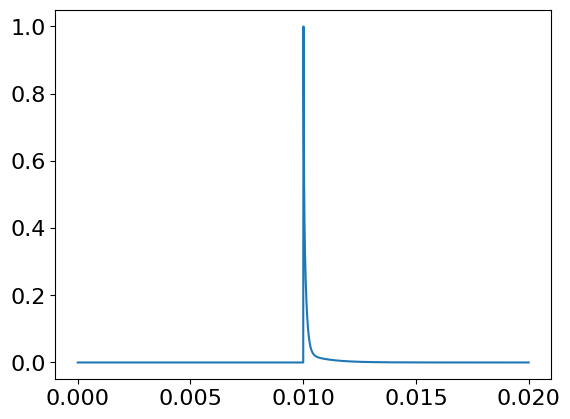

In [8]:
plt.plot(testtime,test2)

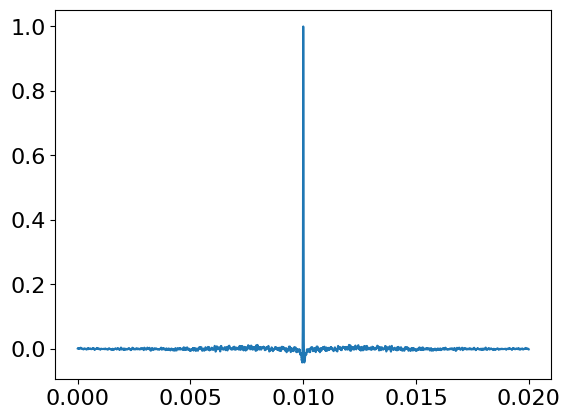

In [9]:
plt.plot(testtime,test)